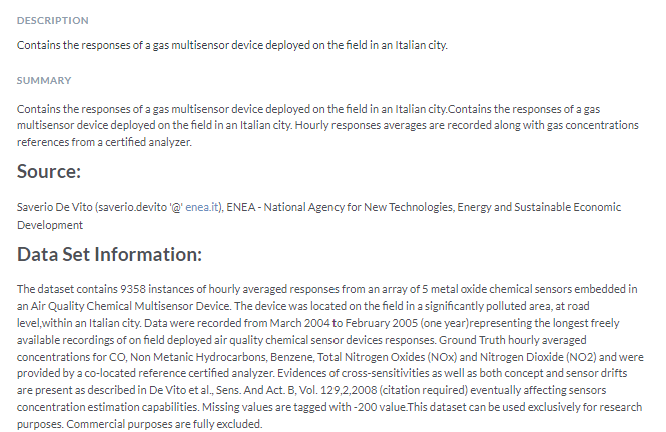
Source: https://data.world/uci/air-quality

# Table Of Content
 1. Brief Introduction & Goal
 2. Exploration of Data
 3. Prepping & Choosing of Variables
 4. Machine Learning

**Brief Introduction** <br>
Website provided 1 dataset (CSV file which has to be replaced & Excel file). <br>
To summarize what are the data provided (refer to "Data Set Information" above for full text),<br>
Date (of recording, Mar'04 to Feb'05), Time (Hourly Interval), Avg Hr Concentration for CO, PT08.S1 (Titania), Non Metanic Hydrocarbons (NMHC), C6H6 (Benzene), PT08.S2 (Titania), Total Nitrogen Oxides (NOx), PT08.S3 (Tungsten Oxide, NOx Targetted), Nitrogen Dioxide (NO2), PT08.S4 (Tungsten Oxide, NO2 Targetted), PT08.S5 (Indium Oxide), Temperature, Relative Humidity, Absolute Humdity. <br> <br>
These recordings are mostly common air pollutants (meaning this is to calculate Air Quality as the name implies). <br>
(*This is for outdoors*) <br>
PM catergory values weren't provided, thus unable to allocate quality accordingly. <br>
Missing Values were give -200<br><br>
**Goal**<br>
Predict the Air Quality (Concentration of pollutants in air in X hours/days/months) <br>
   - Linear Regression <br>
   - Time Series (maybe) <br>
   
Check for Anomalies & Hopefully understand the cause behind it (e.g. Googling what happened if possible)

### Exploration of Data

In [49]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()
from statistics import mean

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from datetime import datetime
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates

In [2]:
df = pd.read_csv('AirQualityUCI.csv')

In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/3/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/3/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/3/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/3/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/3/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [4]:
#Last 2 columns doesn't exist in the file, so will be removed
AQ = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis = 'columns')
AQ.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/3/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/3/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/3/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/3/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/3/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [5]:
AQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [6]:
AQ.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [7]:
#Since all columns shown above have -200 as the min, it would mean that there all null values in all of them
AQ.isnull().sum() #To check if the conversion (xlxs to csv) went as intended

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [8]:
AQ.tail() #To undestand why there is missing values (which might be due to incomplete conversion)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


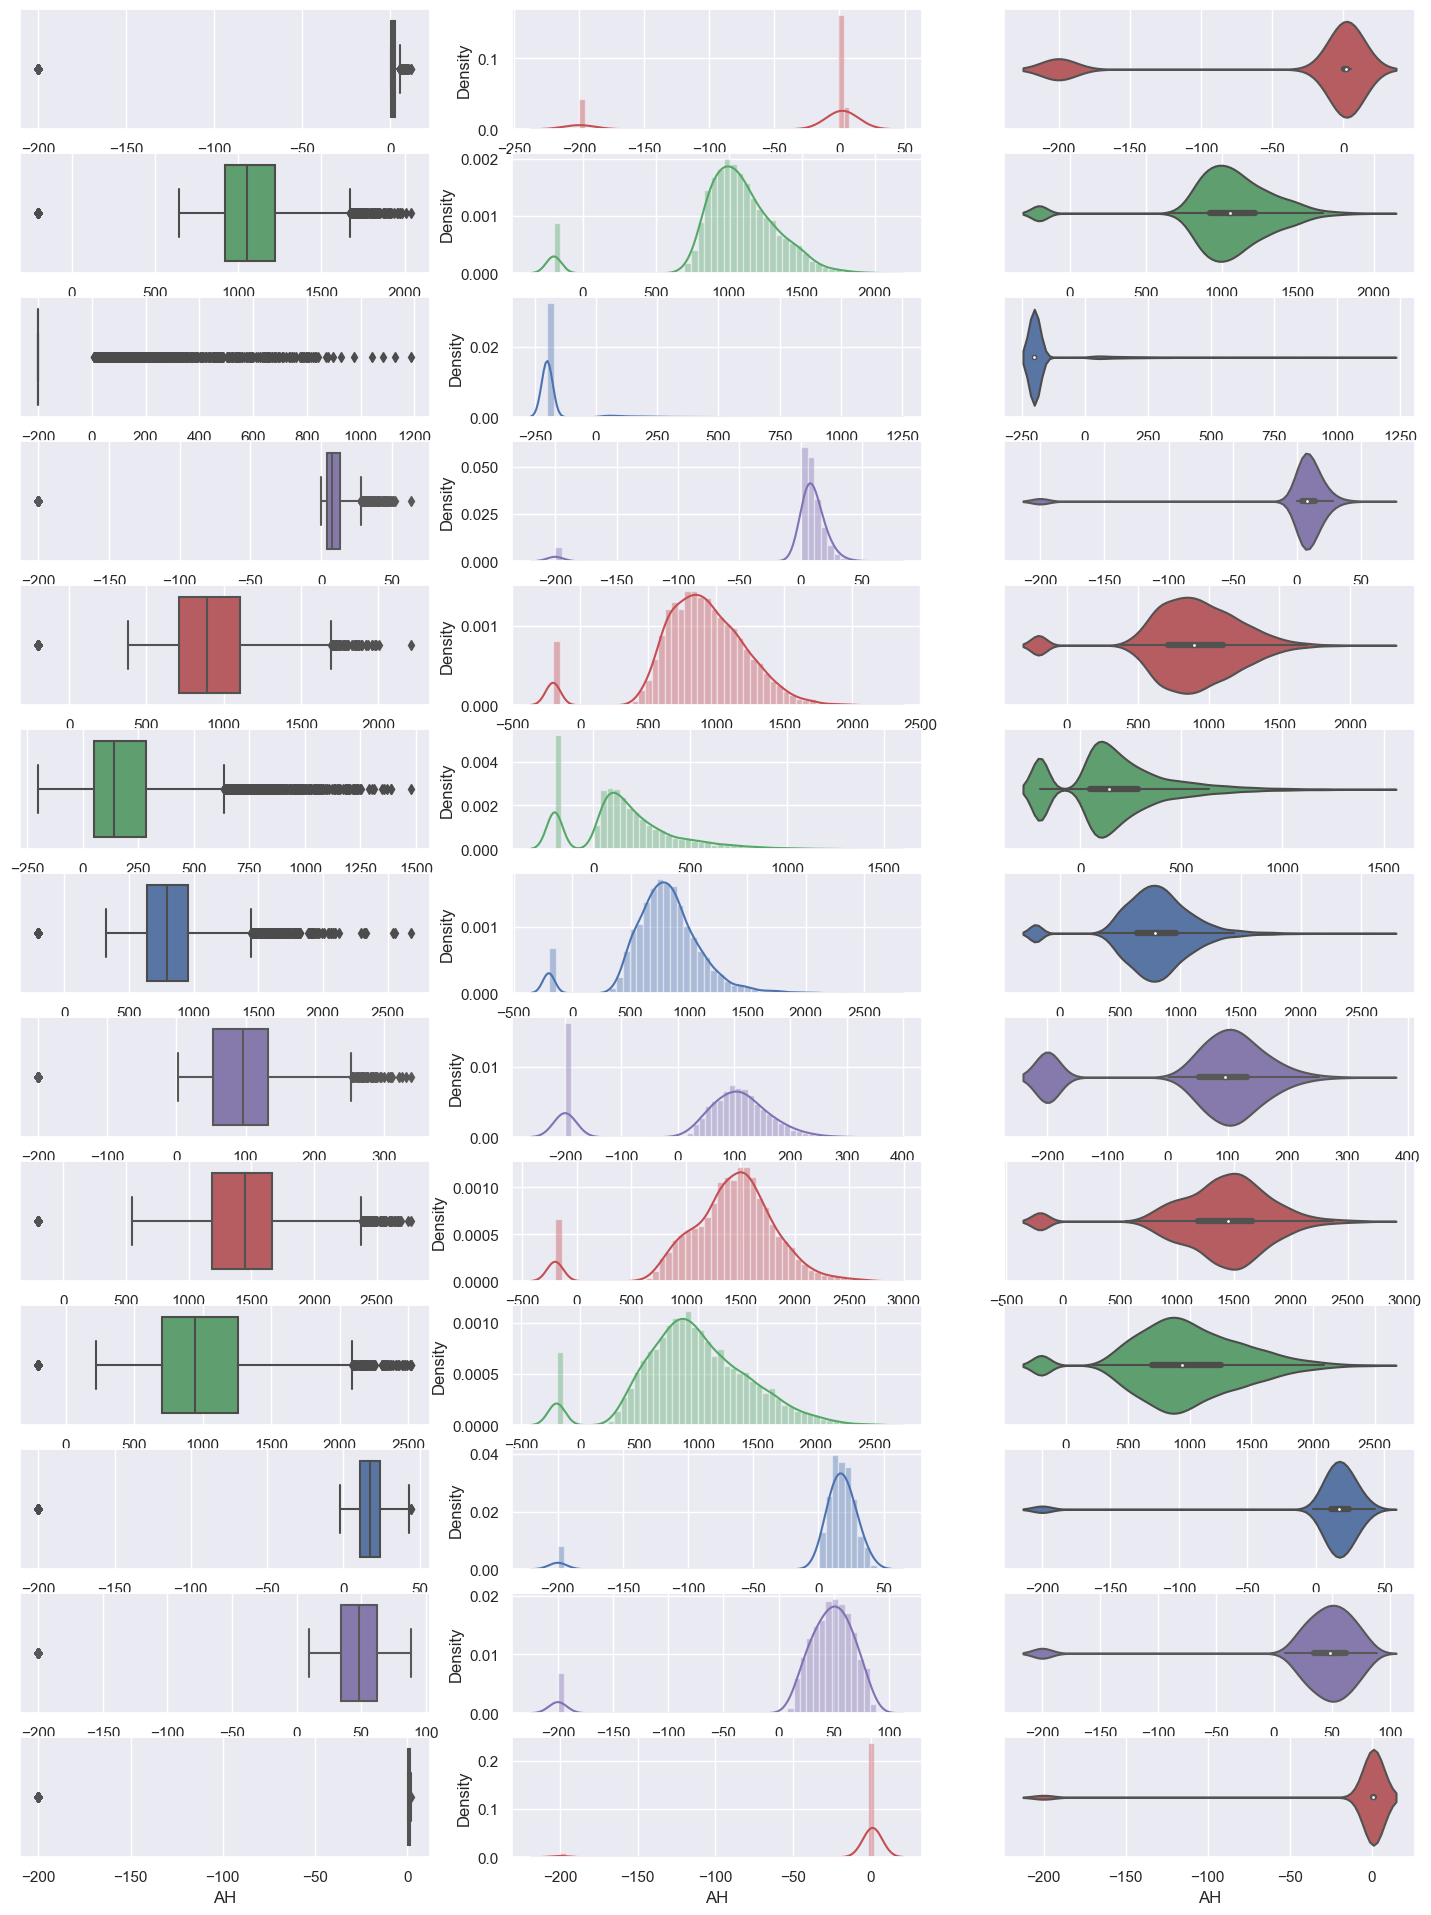

In [9]:
#Since there are actual NaN values, those have to be dealt as well
#Before dealing with the null values, outliers will be checked first
f, axes = plt.subplots(13, 3, figsize=(18, 24))
colors = ["r", "g", "b", "m", "c"]

countColor = 0
count = 0
for var in AQ.iloc[0:0, 2:]:
    #print(var)
    if countColor == 4:
        countColor = 0
    sb.boxplot(AQ[var], orient = "h", color = colors[countColor], ax = axes[count,0])
    sb.distplot(AQ[var], color = colors[countColor], ax = axes[count,1])
    sb.violinplot(AQ[var], color = colors[countColor], ax = axes[count,2])
    count+=1
    countColor+=1

It seeems that -200 doesn't have much effect on the boxplots except for NHMC(GT), which would mean we might be be able to 
ignore (delete) the value's row. However by doing so, there might be accidental deletion of any useful values that might exist in the same row. <br>
Thus, instead of deleting, the value would be substituted with the mode value instead.

In [10]:
AQ.replace(-200,0,inplace=True) #Replace all -200 with 0 as the excel file surprisingly has no values with 0
AQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [11]:
AQ.sample(n=5) #To see if it worked

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
2073,5/6/2004,3:00:00,1.3,937.0,0.0,6.9,853.0,0.0,962.0,0.0,1604.0,969.0,19.8,53.6,1.2214
4037,25/8/2004,23:00:00,1.5,954.0,0.0,7.0,855.0,89.0,792.0,94.0,1474.0,745.0,25.2,40.8,1.2877
2514,23/6/2004,12:00:00,2.2,1053.0,0.0,13.1,1087.0,163.0,763.0,106.0,1762.0,1023.0,34.9,20.5,1.1279
2285,13/6/2004,23:00:00,0.8,814.0,0.0,2.6,627.0,46.0,1305.0,57.0,1351.0,446.0,19.6,45.3,1.0244
4693,22/9/2004,7:00:00,4.1,1376.0,0.0,25.9,1452.0,531.0,521.0,108.0,2123.0,1541.0,18.5,68.9,1.4565


In [12]:
AQ.dropna(axis=0,how='any',inplace=True) #Drop all existing blank rows
AQ.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [13]:
AQ.describe()  #Time to deal with the missing values (0) by substituting it with mean value

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1.765545,1056.813081,21.373731,9.688704,902.418296,203.649567,802.813188,93.245592,1399.302661,982.895052,17.601325,47.308400,0.985417
std,1.554264,301.246318,91.103489,7.559785,318.696890,214.993187,299.356129,61.479820,441.458774,438.074058,9.357750,19.474603,0.442966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.900000,0.000000,0.000000
25%,0.600000,921.000000,0.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,0.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,0.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


The mean for all the columns is decent now (no negative value for concentration), therefore it will be used to replace the 0 value

In [14]:
for var in AQ.iloc[0:0,2:]:
    AQ[var].replace(0,mean(AQ[var]),inplace=True)

In [15]:
AQ.describe() #To look at the new values after substitution

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.083105,1098.150432,40.659657,10.067678,937.716479,239.321432,834.215307,109.608663,1454.036526,1021.341091,18.291684,49.158873,1.023961
std,1.324445,212.955072,86.692576,7.303051,261.657185,194.123971,251.823676,44.565033,339.547205,390.689344,8.656692,16.978907,0.395912
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.200000,941.000000,21.373731,4.600000,743.000000,112.000000,666.000000,86.000000,1242.000000,742.000000,12.000000,36.600000,0.746100
50%,1.765545,1056.813081,21.373731,8.600000,902.418296,203.649567,802.813188,96.000000,1446.000000,982.895052,17.601325,48.600000,0.985417
75%,2.600000,1221.000000,21.373731,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


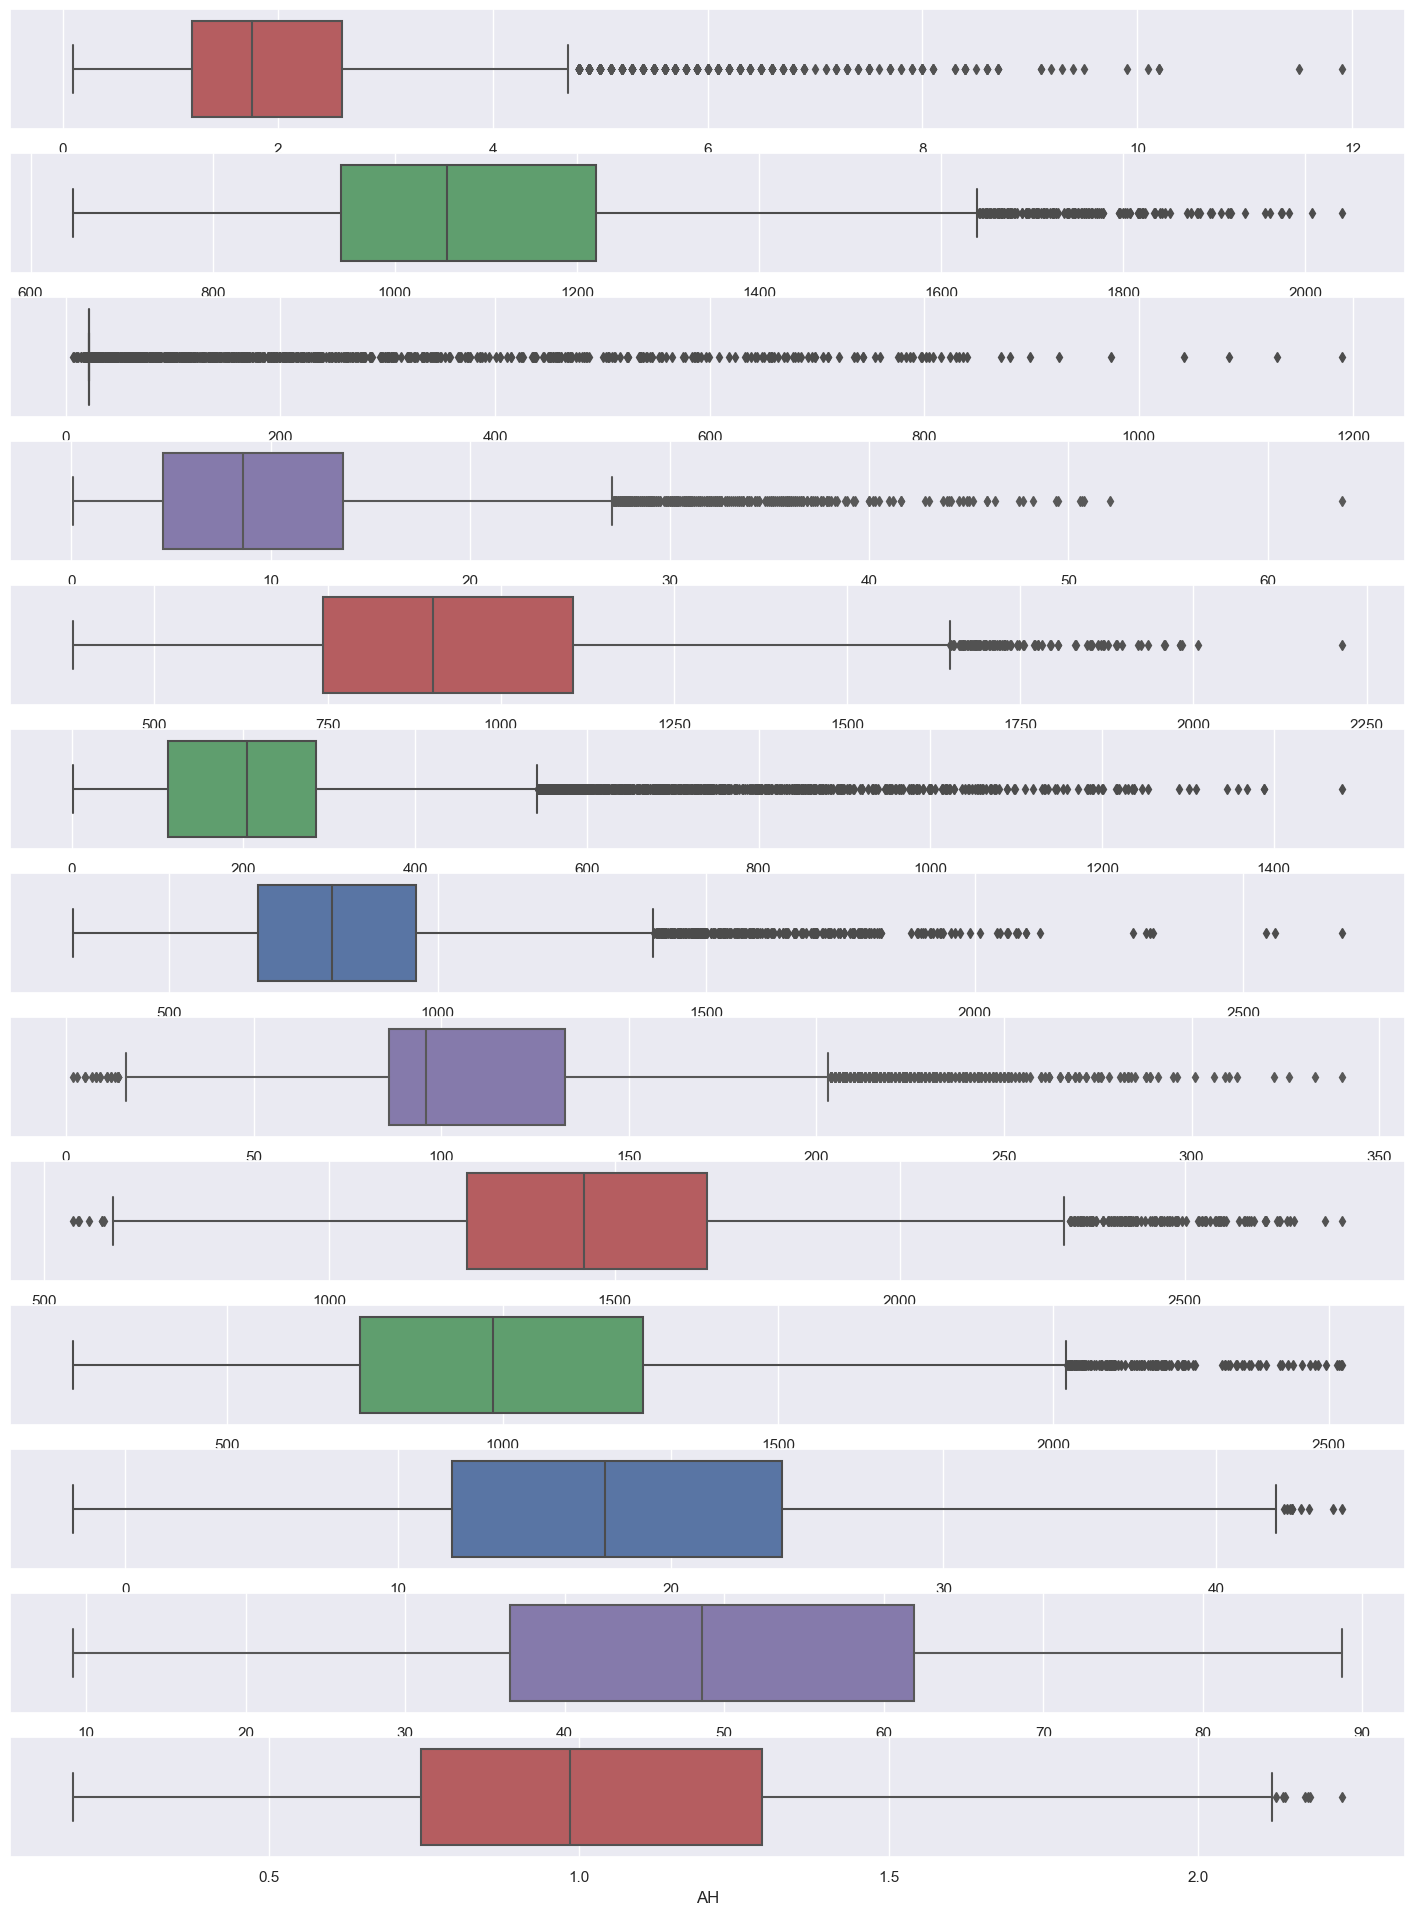

In [16]:
f, axes = plt.subplots(13, 1, figsize=(18, 24))
colors = ["r", "g", "b", "m", "c"]

countColor = 0
count = 0
for var in AQ.iloc[0:0, 2:]:
    #print(var)
    if countColor == 4:
        countColor = 0
    sb.boxplot(AQ[var], orient = "h", color = colors[countColor], ax = axes[count])
    count+=1
    countColor+=1

It seems that even after substituting the NaN values (-200) with its mean value, it does not produce a viable boxplot but a plot with majority being outliers. Therefore the variable "NHMC(GT)" will not be used or be included in the machine learning model.

### Prepping & Choosing of Variables
Before using the ML models, we will be experimenting with certain variables first to see if they might be a better fit for predicting. To start off, we will be using a varaible with the most correlations (and > +/-0.75) then variable with the least outliers as a ground test. Afterwards, it would be a group to compare. Linear Regression will be used for most of the time since all are numeric variables. Might try out a certain TimeSeries ML model if possible.
<br> <br>
Reason for Using LR Model (only): <br>
(Lei et al., Using Machine Learning Methods to Forecast Air Quality: A Case Study in Macao 2022)

In [17]:
dataPredictors = AQ.iloc[:-1,2:]

Q1 = dataPredictors.quantile(0.25)
Q3 = dataPredictors.quantile(0.75)
outliers = ((dataPredictors < (Q1 - 1.5 * (Q3 - Q1))) | (dataPredictors > (Q3 + 1.5 * (Q3 - Q1))))

outliers.sum()

CO(GT)           454
PT08.S1(CO)      145
NMHC(GT)         914
C6H6(GT)         286
PT08.S2(NMHC)     91
NOx(GT)          778
PT08.S3(NOx)     278
NO2(GT)          380
PT08.S4(NO2)     131
PT08.S5(O3)      130
T                 10
RH                 0
AH                 7
dtype: int64

<AxesSubplot:>

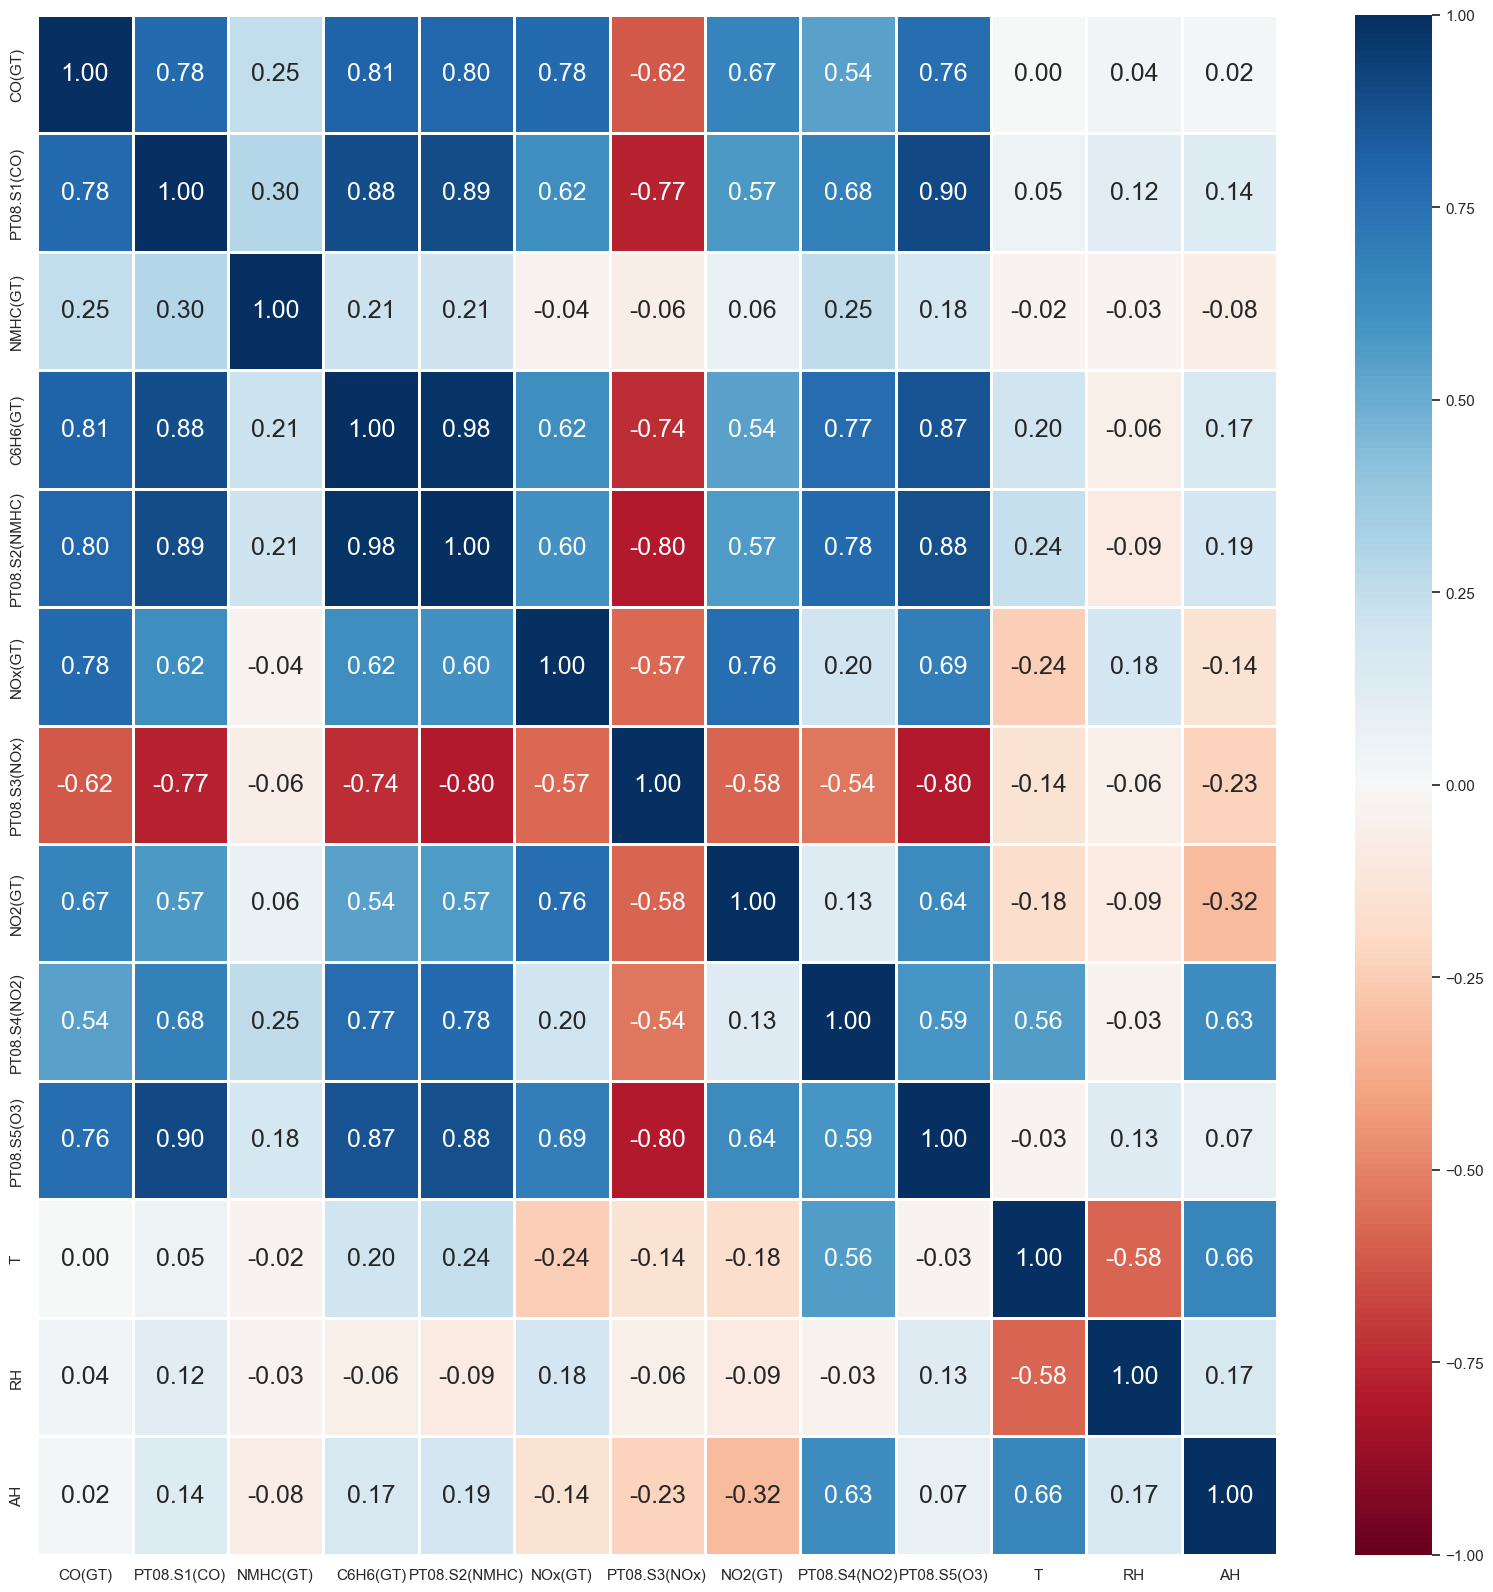

In [18]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(AQ.iloc[0:-1,2:].corr(), vmin = -1, vmax = 1, linewidth = 1, annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap ="RdBu")

For the first LR model, the variable with the most correlations (& > +/- 0.75 corr) will be used which is <br>
PT08.S2(NMHC) with CO(GT), PT08.S1(C0), C6H6(GT), PT08.S3(NOx), PT08.S4(NO2), PT08.S5(O3)

## Machine Learning (Linear Regression)

In [19]:
linreg = LinearRegression()

In [20]:
ptNMHC = AQ[["PT08.S2(NMHC)"]]
Set1 = AQ[["CO(GT)", "PT08.S1(CO)", "C6H6(GT)", "PT08.S3(NOx)", "PT08.S4(NO2)", "PT08.S5(O3)"]]
X_train, X_test, y_train, y_test = train_test_split(ptNMHC, Set1, test_size=0.3, random_state=42)
#Preference to have it randomized

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (6549, 1) (6549, 6)
Test Set  : (2808, 1) (2808, 6)


In [21]:
linreg.fit(X_train, y_train) #Fitting

LinearRegression()

Intercept 	: b =  [  -1.65300327  417.66184592  -15.49264608 1556.8211934   514.91361268
 -209.54501202]
Coefficients 	: a =  [[ 0.00398309]
 [ 0.72618493]
 [ 0.02724777]
 [-0.77235408]
 [ 1.0020206 ]
 [ 1.31495685]]


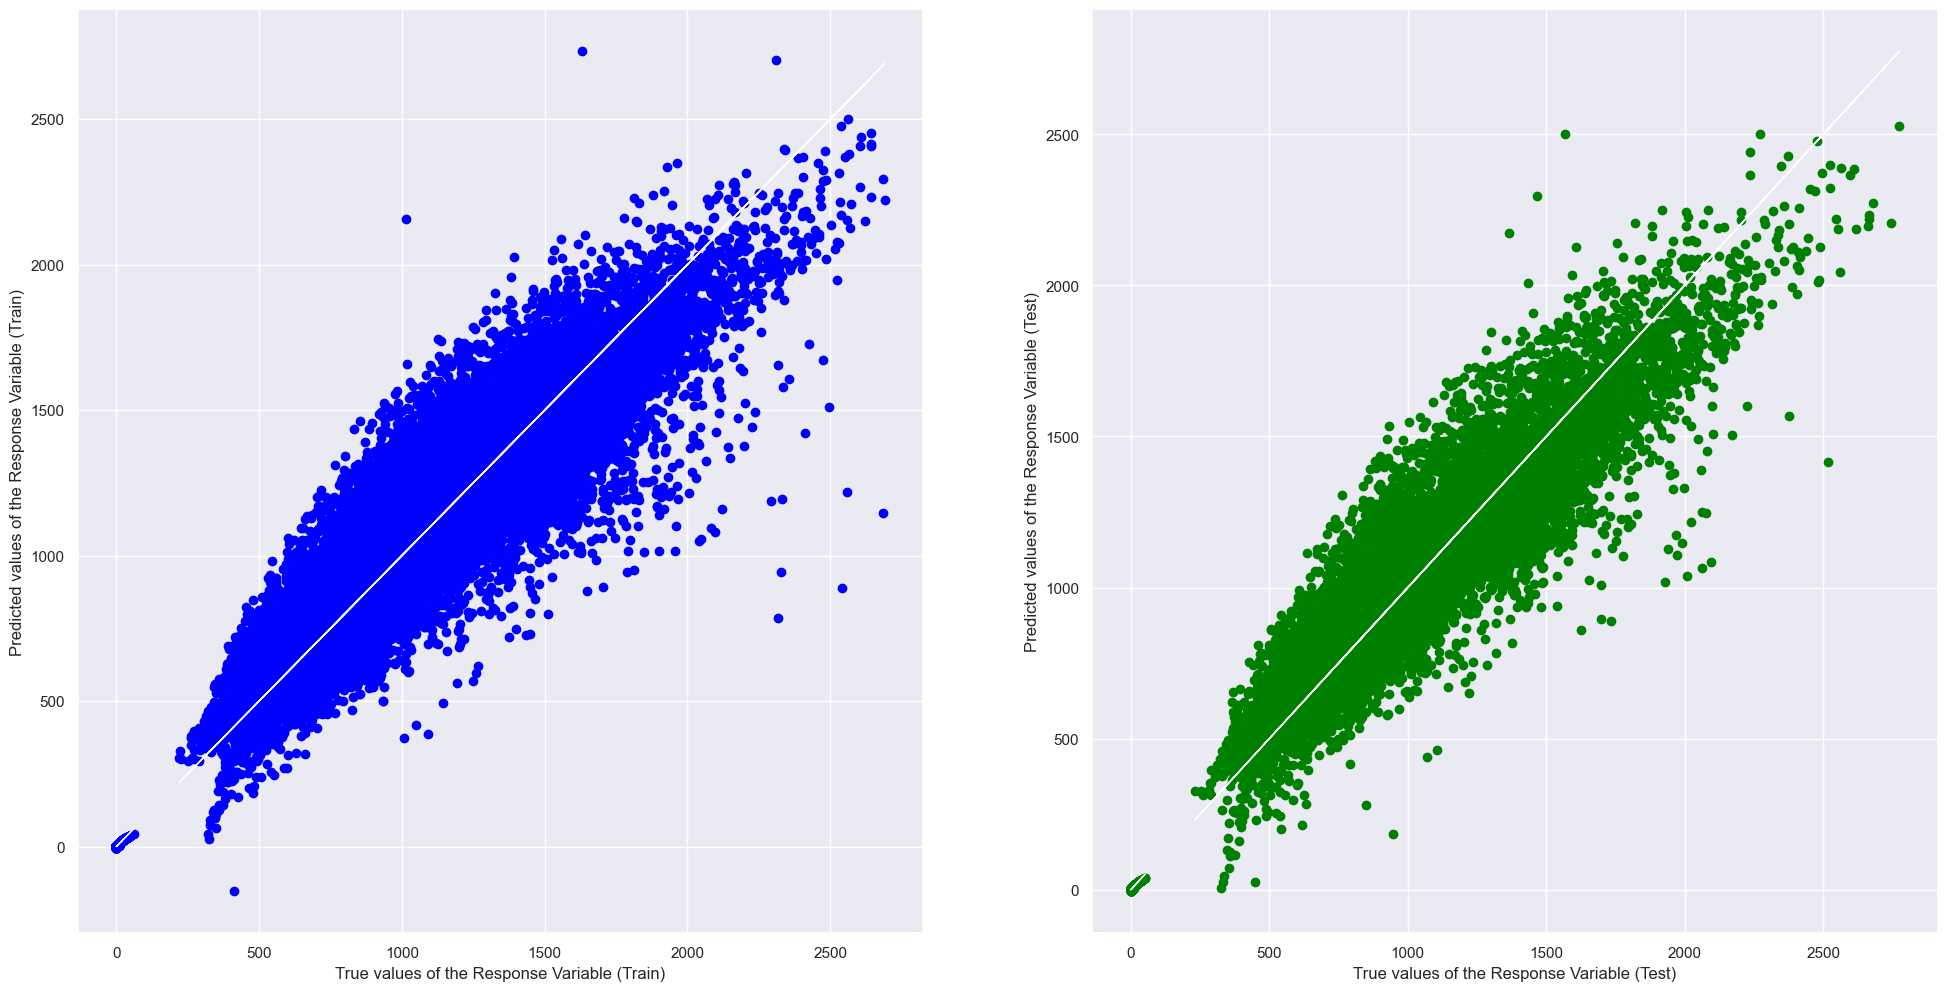

In [22]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [23]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7303244520351955
Mean Squared Error (MSE) 	: 18918.899692913998

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7433175566146106
Mean Squared Error (MSE) 	: 18274.966575342867



Of course high correlation would lead to a decent scoring for R^2 value (with ~0.01 difference between test & train set). <br>
However, the MSE value seems to be very high which would indicate that the predictor variable used might be good enough or in fact, unusable for prediction. <br> Now we will use the same variable but to predict the rest.

In [24]:
ptNMHC = AQ[["PT08.S2(NMHC)"]]
Set2 = AQ[["CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]]
X_train, X_test, y_train, y_test = train_test_split(ptNMHC, Set2, test_size=0.3, random_state=42)
#Preference to have it randomized

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (6549, 1) (6549, 12)
Test Set  : (2808, 1) (2808, 12)


In [25]:
linreg.fit(X_train, y_train) #Fitting

LinearRegression()

Intercept 	: b =  [-1.65300327e+00  4.17661846e+02 -1.85636236e+01 -1.54926461e+01
 -1.85074405e+02  1.55682119e+03  1.92503570e+01  5.14913613e+02
 -2.09545012e+02  1.08260514e+01  5.51110505e+01  7.66198423e-01]
Coefficients 	: a =  [[ 3.98308624e-03]
 [ 7.26184935e-01]
 [ 6.16320838e-02]
 [ 2.72477729e-02]
 [ 4.53853276e-01]
 [-7.72354076e-01]
 [ 9.64013479e-02]
 [ 1.00202060e+00]
 [ 1.31495685e+00]
 [ 7.93316127e-03]
 [-6.11380833e-03]
 [ 2.78286984e-04]]


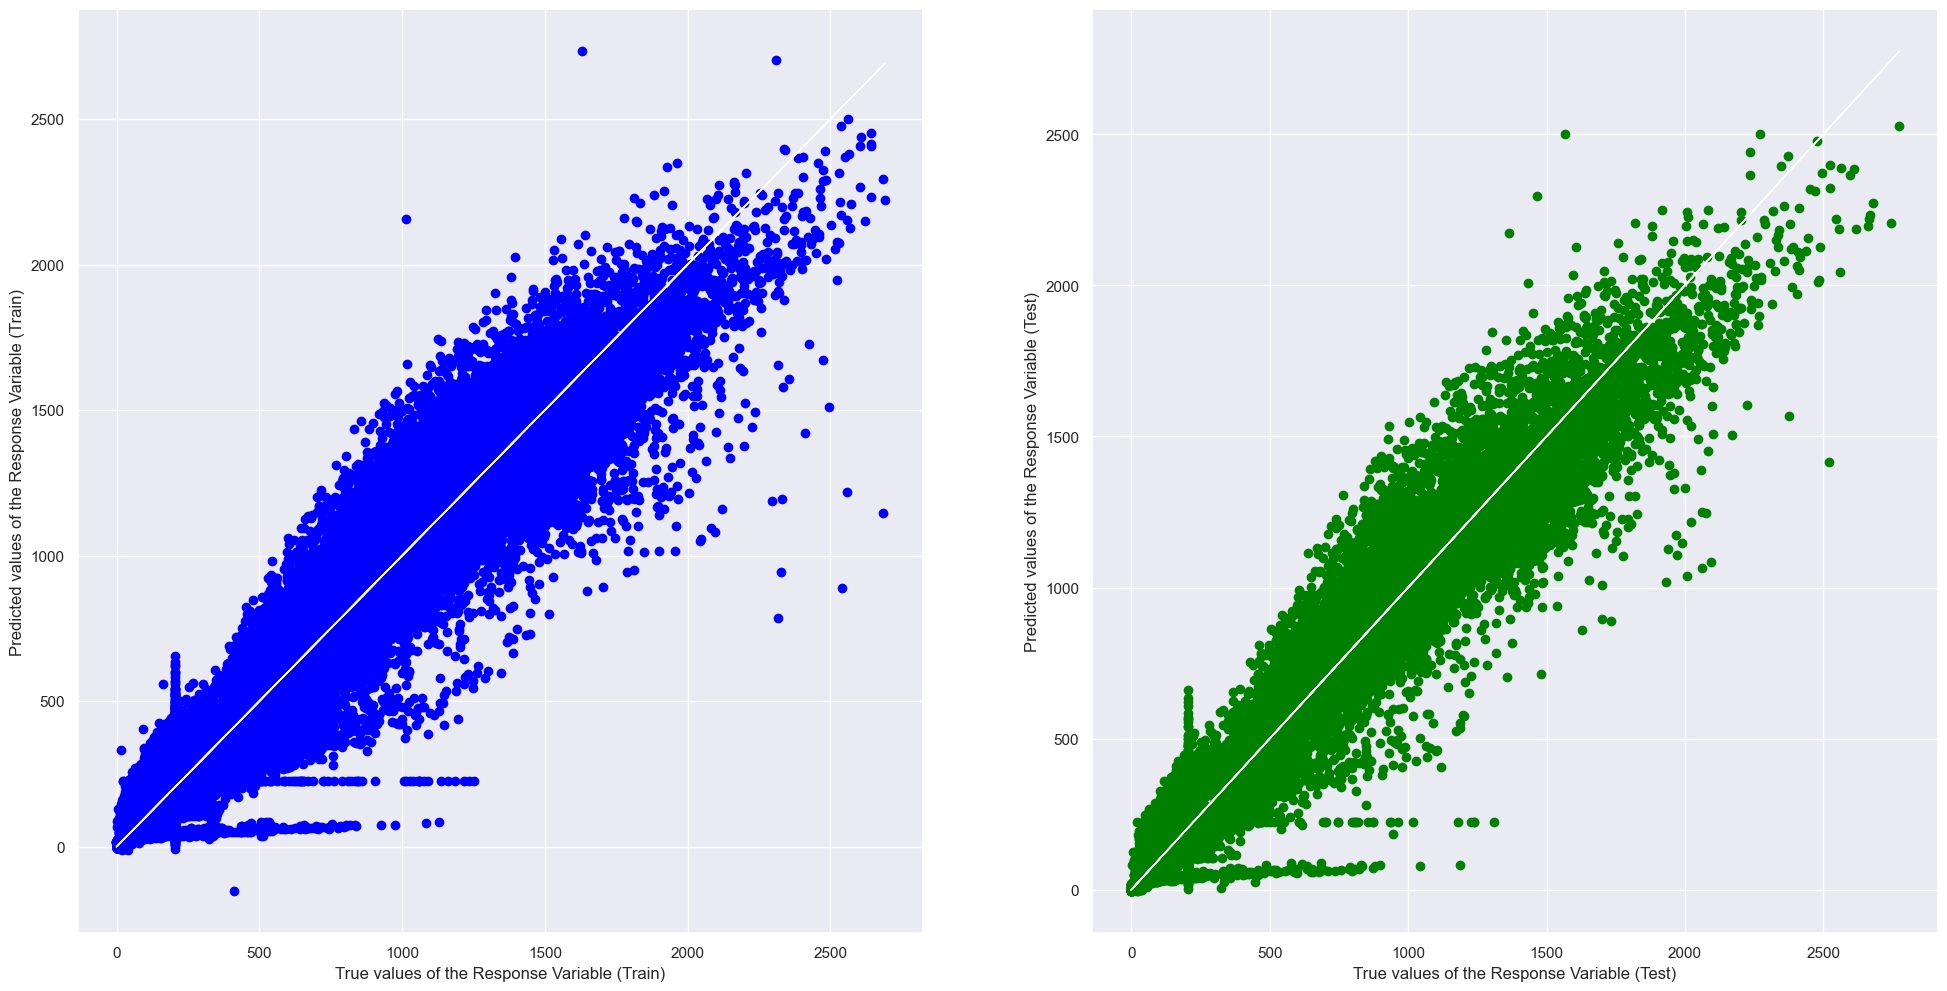

In [26]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [27]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.43377246118462437
Mean Squared Error (MSE) 	: 12093.92292370488

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4414408687733604
Mean Squared Error (MSE) 	: 12105.696518897328



With this model, it further shows that high correlated variables may not be a good key predictor in predicting the variables. Therefore, we will move on to using variables with least amount of outliers to predict.

In [28]:
ptNMHC = AQ[["RH"]]
Set2 = AQ[["CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "AH"]]
X_train, X_test, y_train, y_test = train_test_split(ptNMHC, Set2, test_size=0.3, random_state=42)
#Preference to have it randomized

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (6549, 1) (6549, 12)
Test Set  : (2808, 1) (2808, 12)


In [29]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept 	: b =  [-1.65300327e+00  4.17661846e+02 -1.85636236e+01 -1.54926461e+01
 -1.85074405e+02  1.55682119e+03  1.92503570e+01  5.14913613e+02
 -2.09545012e+02  1.08260514e+01  5.51110505e+01  7.66198423e-01]
Coefficients 	: a =  [[ 3.98308624e-03]
 [ 7.26184935e-01]
 [ 6.16320838e-02]
 [ 2.72477729e-02]
 [ 4.53853276e-01]
 [-7.72354076e-01]
 [ 9.64013479e-02]
 [ 1.00202060e+00]
 [ 1.31495685e+00]
 [ 7.93316127e-03]
 [-6.11380833e-03]
 [ 2.78286984e-04]]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: -21.027700760274932
Mean Squared Error (MSE) 	: 681304.4462820379

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -20.56248217151999
Mean Squared Error (MSE) 	: 689205.2047977407



This iteration of the model seems to have the worst performance which definitely indicates that lowest amount of outliers won't be a good key predictor. <br>
However, what if we use the humidity and temperature variables to predict?

In [30]:
ptNMHC = AQ[["T","RH","AH"]]
Set2 = AQ[["CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)"]]
X_train, X_test, y_train, y_test = train_test_split(ptNMHC, Set2, test_size=0.3, random_state=42)
#Preference to have it randomized

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (6549, 3) (6549, 10)
Test Set  : (2808, 3) (2808, 10)


In [31]:
linreg.fit(X_train, y_train) #Fitting

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept 	: b =  [   1.45665067  844.27881933   25.03384876    4.28729434  687.61350351
  241.19431642 1010.02661219  151.9557612   577.8769619   811.08077527]
Coefficients 	: a =  [[ 2.44179044e-02  1.16981266e-02 -4.00478433e-01]
 [ 7.12054111e+00  3.73980276e+00 -6.10610171e+01]
 [ 1.58790604e+00  5.73436945e-01 -4.21886109e+01]
 [ 2.33215205e-01  4.28697633e-02 -6.72612108e-01]
 [ 1.11111686e+01  2.03056451e+00 -5.47163725e+01]
 [-1.29908250e+00  1.87302847e+00 -6.91920867e+01]
 [-9.59562876e-01 -6.13412981e-01 -1.23859195e+02]
 [-1.59532037e-02 -1.27319646e-01 -3.51237992e+01]
 [ 2.35487839e+01  5.65920148e+00  1.60088623e+02]
 [ 2.14168827e+00  3.37074728e+00  2.46607135e+00]]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.08349857879534828
Mean Squared Error (MSE) 	: 42144.700385618744

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.08444337620214512
Mean Squared Error (MSE) 	: 43645.873997457005



It seems that the model's performance is quite poor, it could be due to the fact that the variables itself may not be a key indicator in predicting other varaibles. One suggestion to probably go about this is to try other kinds of ML models (e.g. Random Tree Classifier or a Time Series Forecast). <br>
If not, there is not much of a conclusion to be draw here aside from the fact either the variables can't be used to predict (each other) or that a more suitable model has to be used.